<a href="https://colab.research.google.com/github/MariaCarmelaPascale/Progetto-ML-e-SII/blob/main/DataBalancing_CervicalRiskPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparazione

In [ ]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve

from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns


In [ ]:
df = pd.read_csv('cervicalCancerCleaned.csv')
df.shape # (rows, columns)

(968, 24)

In [ ]:
print(df['Hinselmann'].value_counts())

print(df['Schiller'].value_counts())

print(df['Biopsy'].value_counts())

print(df['Citology'].value_counts())

0    930
1     38
Name: Hinselmann, dtype: int64
0    887
1     81
Name: Schiller, dtype: int64
0    907
1     61
Name: Biopsy, dtype: int64
0    918
1     50
Name: Citology, dtype: int64


In [ ]:
#creazione attributo CervicalCancer dato dalla somma dei 4 test
df['Cervical Cancer'] = df['Hinselmann'] + df['Schiller'] + df['Citology'] + df['Biopsy']

In [ ]:
cols = ['Hinselmann','Schiller','Citology','Biopsy','Cervical Cancer']

In [ ]:
df[cols].sample(50)

,Hinselmann,Schiller,Citology,Biopsy,Cervical Cancer
36,0,0,0,0,0
231,0,0,0,0,0
736,0,0,0,0,0
629,0,0,0,0,0
571,0,0,0,0,0
480,0,0,0,0,0
853,0,0,0,0,0
807,0,0,0,0,0
959,0,0,0,0,0
742,0,0,0,0,0


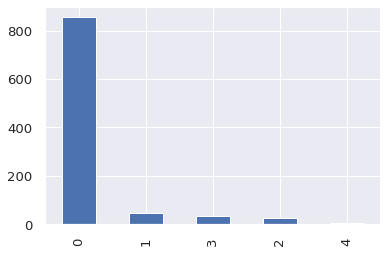

In [ ]:
df['Cervical Cancer'].value_counts().plot(kind='bar');

In [ ]:
df['Cervical Cancer'].value_counts()

0    855
1     46
3     36
2     24
4      7
Name: Cervical Cancer, dtype: int64

In [ ]:
#Per migliorare la predizione si sostituisce il valore di Cervical Cancer con 1 quando il valore è > 0
df['Cervical Cancer']=np.where(df['Cervical Cancer']>0,1,df['Cervical Cancer'])

In [ ]:
df['Cervical Cancer'].value_counts()

0    855
1    113
Name: Cervical Cancer, dtype: int64

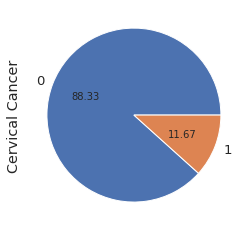

In [ ]:
ax = df['Cervical Cancer'].value_counts().plot.pie(autopct='%.2f')
#_ = ax.set_title("Random Over-sampling")

In [ ]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['STDs','STDs:condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:genital herpes', 
                  'STDs:HIV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']
                
category_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

In [ ]:
for feature in numerical_df:
  count = df[feature].isna().sum()
  print('%s:' %feature + '%d' %count)

Age:0
Number of sexual partners:29
First sexual intercourse:10
Num of pregnancies:70
Smokes (years):16
Smokes (packs/year):16
Hormonal Contraceptives (years):122
IUD (years):133
STDs (number):122


In [ ]:
for feature in categorical_df:
  count = df[feature].isna().sum()
  print('%s:' %feature + '%d' %count)

STDs:122
STDs:condylomatosis:122
STDs:vulvo-perineal condylomatosis:122
STDs:syphilis:122
STDs:genital herpes:122
STDs:HIV:122
STDs: Number of diagnosis:0
Dx:Cancer:0
Dx:CIN:0
Dx:HPV:0
Dx:0
Hinselmann:0
Schiller:0
Citology:0
Biopsy:0


In [ ]:
#Devo eliminare i valori nulli, altrimenti non funziona la predizione. Per gli attributi numerici, inserisco la media. 
#Per gli attributi booleani inserisco come valore 0.

for feature in numerical_df:
    print(feature,'',df[feature].mean())
    feature_mean = round(df[feature].mean(),1)
    df[feature] = df[feature].fillna(feature_mean)

Age  26.880165289256198
Number of sexual partners  2.554845580404686
First sexual intercourse  16.96346555323591
Num of pregnancies  2.2371937639198216
Smokes (years)  1.2669029060336132
Smokes (packs/year)  0.44742021277310906
Hormonal Contraceptives (years)  2.220087944494091
IUD (years)  0.49777245508982043
STDs (number)  0.17375886524822695


In [ ]:
for feature in categorical_df:
  df[feature] = df[feature].fillna(0)

#Predict

In [ ]:
def models_lr(X_train,y_train, X_test, y_test):
    mod = {}
    model = LogisticRegression().fit(X_train,y_train)
    ypred = model.predict(X_test)
    mod['Model'] = 'LogisticRegression'
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(X_test)
    fpr1, tpr1, thresh1 = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label = 1)
    plt.plot(fpr1, tpr1, linestyle = "--", color = "green", label = "Logistic Regression")
    return mod


def models_dt(X_train,y_train, X_test, y_test):
    mod = {}
    model = DecisionTreeClassifier().fit(X_train,y_train)
    ypred = model.predict(X_test)
    mod['Model'] = 'Decision Tree'
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(X_test)
    fpr2, tpr2, thresh2 = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label = 1)
    plt.plot(fpr2, tpr2, linestyle = "--", color = "blue", label = "Decision Tree")
    return mod


def models_rf(X_train,y_train, X_test, y_test):
    mod = {}
    model = RandomForestClassifier().fit(X_train,y_train)
    ypred = model.predict(X_test)
    mod['Model'] = 'Random Forest'
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(X_test)
    fpr3, tpr3, thresh3 = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label = 1)
    plt.plot(fpr3, tpr3, linestyle = "--", color = "yellow", label = "Random Forest")
    return mod


def models_nb(X_train,y_train, X_test, y_test):
    mod = {}
    model = GaussianNB().fit(X_train,y_train)
    ypred = model.predict(X_test)
    mod['Model'] = 'GaussianNB'
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(X_test)
    fpr4, tpr4, thresh4 = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label = 1)
    plt.plot(fpr4, tpr4, linestyle = "--", color = "orange", label = "Naive bayes")
    return mod


def models_knn(X_train,y_train, X_test, y_test):
    mod = {}
    model = KNeighborsClassifier().fit(X_train,y_train)
    ypred = model.predict(X_test)
    mod['Model'] = 'KNN'
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(X_test)
    fpr5, tpr5, thresh5 = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label = 1)
    plt.plot(fpr5, tpr5, linestyle = "--", color = "purple", label = "KNN")
    return mod


In [ ]:
def predict(X_resampled, y_resampled):
  #Standardizzazione delle feature con Standard Scaler
  scaler=StandardScaler()
  scaled_feature=scaler.fit_transform(X_resampled)
  X = scaled_feature
  y = y_resampled

  #Split del dataset in train/test.
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
  #X_train.shape,y_train.shape
  #X_test.shape,y_test.shape
  l = []
  l.append(models_lr(X_train,y_train,X_test,y_test))
  l.append(models_dt(X_train,y_train, X_test, y_test))
  l.append(models_rf(X_train,y_train, X_test, y_test))
  l.append(models_nb(X_train,y_train, X_test, y_test))
  l.append(models_knn(X_train,y_train, X_test, y_test))
  base_df = pd.DataFrame(l)
  plt.title('Receiver Operator Characteristics (ROC)')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')

  plt.legend(loc = 'best')
  plt.savefig('ROC', dpi = 300)
  plt.show()
  return base_df


#Balanced Dataset

##Dataset completo

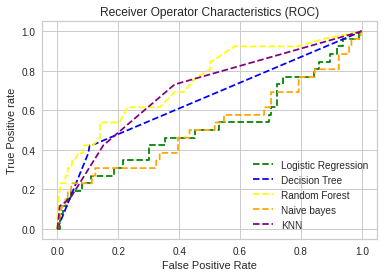

,Model,Test_accuracy,f1score,recall,precision
0,LogisticRegression,0.903780,0.176471,0.115385,0.375000
1,Decision Tree,0.852234,0.317460,0.384615,0.270270
2,Random Forest,0.917526,0.333333,0.230769,0.600000
3,GaussianNB,0.859107,0.226415,0.230769,0.222222
4,KNN,0.886598,0.195122,0.153846,0.266667


In [ ]:
X = df.drop(columns=['Hinselmann','Schiller','Citology','Biopsy','Cervical Cancer'], axis=1)
y = df['Cervical Cancer']
table = predict(X,y)
table

##Oversampling

####Aiuta ad aumentare il numero di esempi di classi di minoranza nel set di dati. Uno dei principali vantaggi del sovracampionamento è che nessuna informazione viene persa dalle classi di maggioranza e minoranza durante il processo. È soggetto a overfitting.

###Random Oversampling

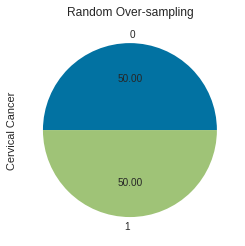

In [ ]:
X = df.drop(columns=['Hinselmann','Schiller','Citology','Biopsy','Cervical Cancer'], axis=1)
y = df['Cervical Cancer']

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=123)

X_resampled, y_resampled = ros.fit_resample(X, y)

ax = y_resampled.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Random Over-sampling")

In [ ]:
y_resampled.value_counts()

0    855
1    855
Name: Cervical Cancer, dtype: int64

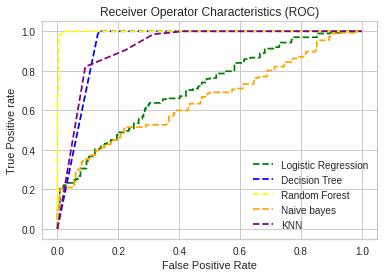

,Model,Test_accuracy,f1score,recall,precision
0,LogisticRegression,0.631579,0.575281,0.488550,0.699454
1,Decision Tree,0.933723,0.939068,1.000000,0.885135
2,Random Forest,0.984405,0.984962,1.000000,0.970370
3,GaussianNB,0.625731,0.489362,0.351145,0.807018
4,KNN,0.838207,0.861436,0.984733,0.765579


In [ ]:
table = predict(X_resampled,y_resampled)
table

###Questi due metodi generano nuovi campioni per interpolazione. SMOTE sta per Synthetic Minority Over-sampling Technique e ADASYN sta per Adaptive Synthetic (ADASYN).

###SMOTE

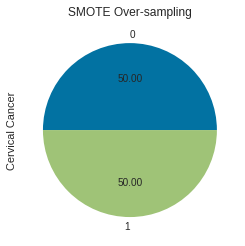

In [ ]:
X = df.drop(columns=['Hinselmann','Schiller','Citology','Biopsy','Cervical Cancer'], axis=1)
y = df['Cervical Cancer']

from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE(random_state=123).fit_resample(X, y)
ax = y_resampled.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("SMOTE Over-sampling")

In [ ]:
y_resampled.value_counts()

0    855
1    855
Name: Cervical Cancer, dtype: int64

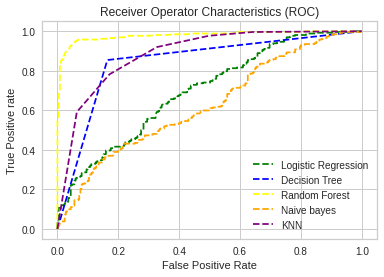

,Model,Test_accuracy,f1score,recall,precision
0,LogisticRegression,0.598441,0.531818,0.446565,0.657303
1,Decision Tree,0.844055,0.847909,0.851145,0.844697
2,Random Forest,0.939571,0.939571,0.919847,0.960159
3,GaussianNB,0.541910,0.276923,0.171756,0.714286
4,KNN,0.799220,0.823932,0.919847,0.746130


In [ ]:
table = predict(X_resampled,y_resampled)
table

###ADASYN

In [ ]:
X = df.drop(columns=['Hinselmann','Schiller','Citology','Biopsy','Cervical Cancer'], axis=1)
y = df['Cervical Cancer']

from imblearn.over_sampling import ADASYN

X_resampled, y_resampled = ADASYN(random_state=123).fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

1    861
0    855
Name: Cervical Cancer, dtype: int64

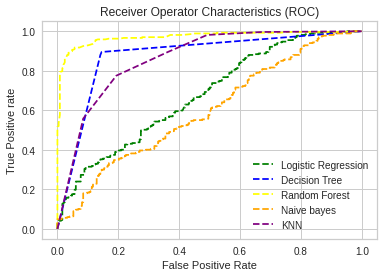

,Model,Test_accuracy,f1score,recall,precision
0,LogisticRegression,0.594175,0.519540,0.423221,0.672619
1,Decision Tree,0.875728,0.881919,0.895131,0.869091
2,Random Forest,0.928155,0.928983,0.906367,0.952756
3,GaussianNB,0.512621,0.222910,0.134831,0.642857
4,KNN,0.770874,0.802013,0.895131,0.726444


In [ ]:
table = predict(X_resampled,y_resampled)
table

##Undersampling

###Random-Undersampling

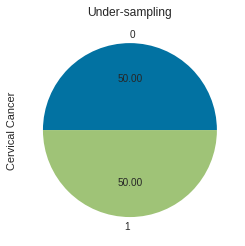

In [ ]:
X = df.drop(columns=['Hinselmann','Schiller','Citology','Biopsy','Cervical Cancer'], axis=1)
y = df['Cervical Cancer']

from imblearn.under_sampling import RandomUnderSampler

X_resampled, y_resampled = RandomUnderSampler(random_state=123).fit_resample(X, y)

ax = y_resampled.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [ ]:
#Class distribution
y_resampled.value_counts()

0    113
1    113
Name: Cervical Cancer, dtype: int64

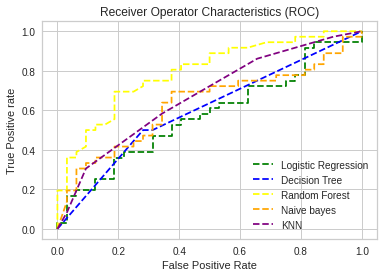

,Model,Test_accuracy,f1score,recall,precision
0,LogisticRegression,0.544118,0.415094,0.305556,0.647059
1,Decision Tree,0.602941,0.571429,0.500000,0.666667
2,Random Forest,0.705882,0.687500,0.611111,0.785714
3,GaussianNB,0.544118,0.279070,0.166667,0.857143
4,KNN,0.617647,0.617647,0.583333,0.656250


In [ ]:
table = predict(X_resampled,y_resampled)
table

##Over-sampling followed by Under-sampling

###SMOOTEEN

In [ ]:
X = df.drop(columns=['Hinselmann','Schiller','Citology','Biopsy','Cervical Cancer'], axis=1)
y = df['Cervical Cancer']

from imblearn.combine import SMOTEENN

X_resampled, y_resampled = SMOTEENN(random_state=123).fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

1    744
0    518
Name: Cervical Cancer, dtype: int64

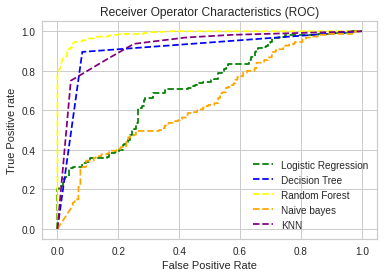

,Model,Test_accuracy,f1score,recall,precision
0,LogisticRegression,0.643799,0.708423,0.745455,0.674897
1,Decision Tree,0.905013,0.916279,0.895455,0.938095
2,Random Forest,0.941953,0.949309,0.936364,0.962617
3,GaussianNB,0.525066,0.366197,0.236364,0.812500
4,KNN,0.857520,0.884120,0.936364,0.837398


In [ ]:
table = predict(X_resampled,y_resampled)
table

#Scelta del tipo di classificatore (Random Forest) e del bilanciamento effettuato (versione ibrida)

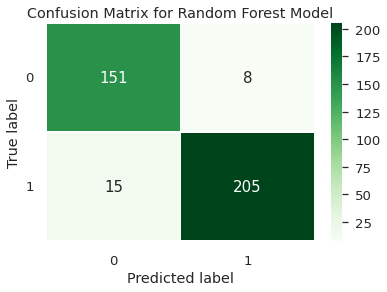

In [ ]:
from imblearn.combine import SMOTEENN

X = df.drop(columns=['Hinselmann','Schiller','Citology','Biopsy','Cervical Cancer'], axis=1)
y = df['Cervical Cancer']


X_resampled, y_resampled = SMOTEENN(random_state=123).fit_resample(X, y)

#Standardizzazione delle feature con Standard Scaler
scaler=StandardScaler()
scaled_feature=scaler.fit_transform(X_resampled)
X = scaled_feature
y = y_resampled

#Split del dataset in train/test.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# istanziamento e fit del RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

# Make predictions for the test set
y_pred_test = forest.predict(X_test)


# View confusion matrix for test data and predictions
matrice_confusione = confusion_matrix(y_test, y_pred_test)
matrice_confusione_finale = matrice_confusione.astype('int')

plt.figure(figsize=(6,4))
sns.set(font_scale=1.2)
sns.heatmap(matrice_confusione_finale, annot=True, fmt="d", annot_kws={'size':15},cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1',]
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

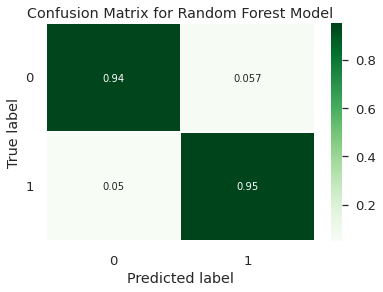

In [ ]:
# Get and reshape confusion matrix data
matrice_confusione = confusion_matrix(y_test, y_pred_test)
matrice_confusione_finale = matrice_confusione.astype('float') / matrice_confusione.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(6,4))
sns.set(font_scale=1.2)
sns.heatmap(matrice_confusione_finale, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '1',]
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()